線性回歸 波士頓房價

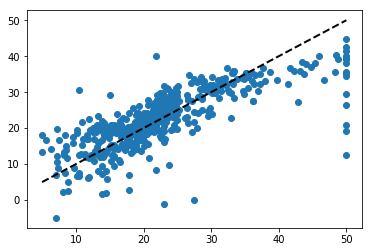

In [11]:
from sklearn import datasets
from sklearn.cross_validation import cross_val_predict #交叉驗證
from sklearn import linear_model #線性回歸
import matplotlib.pyplot as plt
boston=datasets.load_boston()
#print(boston.DESCR)
#print(boston.data)
#print(boston.target)
'''
CRIM(犯罪率)   ZN(房屋大於25000ft比率)  INDUS(住宅比率)
CHAS(有無臨河)  NOX(空汙比率)   RM(房間數)  AGE(自有住宅比率) 
DIS(離市中心距離)  RAD(離高速公路距離)   TAX(房屋稅率)  
PTRATIO(小學老師比率)  B(黑人比率)   LSTAT(低收入比率)  MEDV(受雇者收入)    
'''
lr=linear_model.LinearRegression()
predicted=cross_val_predict(lr,boston.data,boston.target,cv=10)
#boston.data分成10份訓練，其中一份為測試集  boston.target預測值
y=boston.target #預測值
plt.figure()
plt.scatter(y,predicted) #畫出訓練結果(點)
plt.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=2) #畫出預測值(虛線)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from 

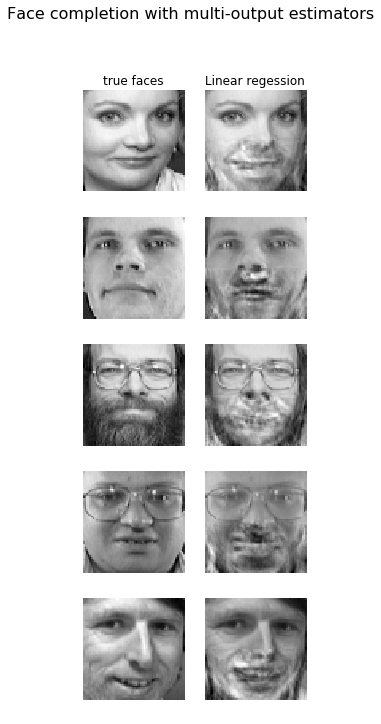

In [29]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
data=datasets.fetch_olivetti_faces()
'''
print(data.DESCR)
print(data.target)
print(data.data)
plt.imshow(data.images[3],cmap='gray',interpolation='nearest') #cmap='gray' 灰階
plt.show()
'''
#把影像變成一列
target=data.target
data=data.images.reshape(len(data.images),-1)
#訓練資料30張臉(300張圖片)，測試資料10張臉(100張圖片)
train=data[target<30]
test=data[target>=30]

#從100張測試影像中，亂數選5張出來
n_faces=5
from sklearn.utils import check_random_state
rng=check_random_state(4)
face_ids=rng.randint(test.shape[0],size=(n_faces, ))
test =test[face_ids, :] #變數test的大小變成(5,4096)

#把訓練影像和測試影像切割成上下兩部分: X人臉上半部分 Y人臉下半部分
n_pixels=data.shape[1]
x_train=train[:,:(n_pixels+1)//2]
y_train=train[:,n_pixels //2:]
x_test=test[:,:(n_pixels+1)//2]
y_test=test[:,n_pixels //2:]

#決定預測的演算法
from sklearn.linear_model import LinearRegression
ESTIMATORS={
    "Linear regession":LinearRegression(),
}
y_test_predict=dict()
for name,estimator in ESTIMATORS.items():
    estimator.fit(x_train ,y_train)  #模型訓練
    y_test_predict[name]=estimator.predict(x_test) #模型預測
    
#畫圖
image_shape=(64,64)
n_cols= 1+len(ESTIMATORS)
plt.figure(figsize=( 2.*n_cols,2.26*n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)
for i in range(n_faces):
    true_face = np.hstack((x_test[i], y_test[i]))
    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")
    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest")
    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((x_test[i], y_test_predict[est][i]))
        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)
        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)
        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest")
plt.show()